In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [2]:

base_dir = r"D:\archive"  
img_height, img_width = 224, 224
batch_size = 32


In [3]:
# Define training and test data generators with rescaling
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Function to create data generators for binary classification
def create_binary_data_generators(category):
    train_dir = os.path.join(base_dir, category, 'train')
    test_dir = os.path.join(base_dir, category, 'test')

    # Load all `good` images as `Non-Defective` for training
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        classes=['good', 'defective']  
    )

    # Load all test images
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=1,
        class_mode='binary',
        shuffle=False  # Keep order to compare predictions
    )

    return train_generator, test_generator



In [4]:
# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output for defective vs non-defective
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



C:\Users\Omkar Jagtap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training and evaluating model for category: cable
Found 224 images belonging to 2 classes.
Found 138 images belonging to 2 classes.
Epoch 1/10


C:\Users\Omkar Jagtap\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8076 - loss: 0.2402 - val_accuracy: 0.5797 - val_loss: 57.8567 - learning_rate: 0.0010
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.0000 - loss: 1.5587e-36 - val_accuracy: 0.5797 - val_loss: 106.3251 - learning_rate: 0.0010
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5797 - val_loss: 137.9259 - learning_rate: 0.0010
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5797 - val_loss: 147.0568 - learning_rate: 5.0000e-04
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step

Classification Report for cable:
               precision    recall  f1-score   support

Non-Defective       0.58      1.00      0.73        80
    Defective       0.00      0.00      0.00        58

     accuracy                           0.58       138
    macro avg       0.29      0.50      0.37       138
 weighted avg       0.34      0.58      0.4

c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


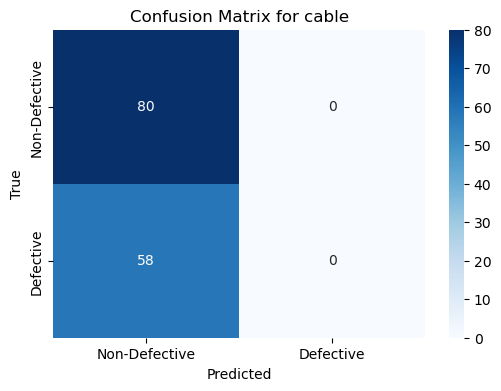


Training and evaluating model for category: grid
Found 264 images belonging to 2 classes.
Found 78 images belonging to 2 classes.
Epoch 1/10


C:\Users\Omkar Jagtap\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7308 - val_loss: 91.7919 - learning_rate: 5.0000e-04
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7308 - val_loss: 93.3110 - learning_rate: 5.0000e-04
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7308 - val_loss: 93.9625 - learning_rate: 5.0000e-04
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7308 - val_loss: 94.0998 - learning_rate: 2.5000e-04
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step

Classification Report for grid:
               precision    recall  f1-score   support

Non-Defective       0.73      1.00      0.84        57
    Defective       0.00      0.00      0.00        21

     accuracy                           0.73        78
    macro avg       0.37      0.50      0.42        78
 weighted avg       0.53      0.7

c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


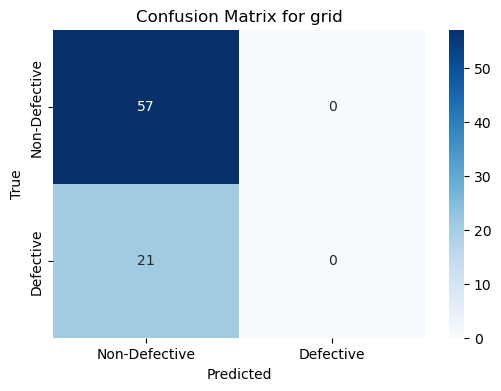


Training and evaluating model for category: metal_nut
Found 220 images belonging to 2 classes.
Found 115 images belonging to 2 classes.
Epoch 1/10


C:\Users\Omkar Jagtap\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8087 - val_loss: 45.6286 - learning_rate: 2.5000e-04
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8087 - val_loss: 45.6405 - learning_rate: 2.5000e-04
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8087 - val_loss: 45.6465 - learning_rate: 2.5000e-04
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8087 - val_loss: 45.6480 - learning_rate: 1.2500e-04
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step

Classification Report for metal_nut:
               precision    recall  f1-score   support

Non-Defective       0.81      1.00      0.89        93
    Defective       0.00      0.00      0.00        22

     accuracy                           0.81       115
    macro avg       0.40      0.50      0.45       115
 weighted avg       0.65  

c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


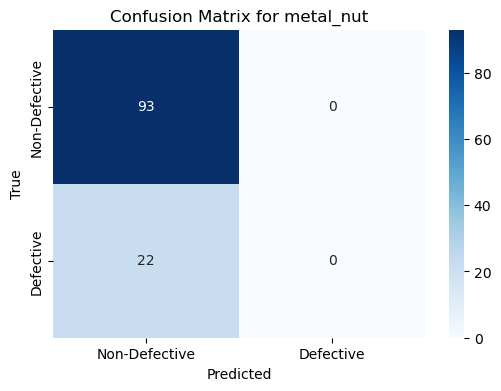


Training and evaluating model for category: screw
Found 320 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Epoch 1/10


C:\Users\Omkar Jagtap\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7437 - val_loss: 114.7232 - learning_rate: 1.2500e-04
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7437 - val_loss: 114.7240 - learning_rate: 1.2500e-04
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7437 - val_loss: 114.7242 - learning_rate: 1.2500e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7437 - val_loss: 114.7242 - learning_rate: 6.2500e-05
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step

Classification Report for screw:
               precision    recall  f1-score   support

Non-Defective       0.74      1.00      0.85       119
    Defective       0.00      0.00      0.00        41

     accuracy                           0.74       160
    macro avg       0.37      0.50      0.43       160
 weighted avg     

c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


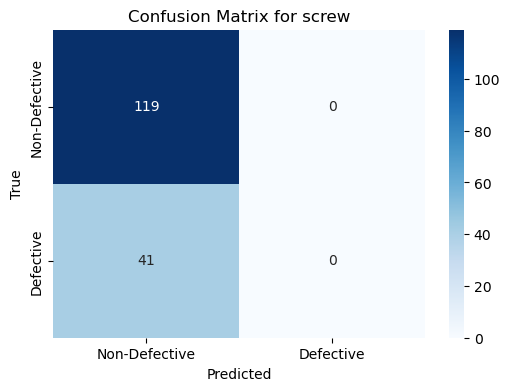


Training and evaluating model for category: transistor
Found 213 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/10


C:\Users\Omkar Jagtap\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.4000 - val_loss: 139.7720 - learning_rate: 6.2500e-05
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.4000 - val_loss: 139.7720 - learning_rate: 6.2500e-05
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.4000 - val_loss: 139.7720 - learning_rate: 6.2500e-05
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.4000 - val_loss: 139.7720 - learning_rate: 3.1250e-05
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step

Classification Report for transistor:
               precision    recall  f1-score   support

Non-Defective       0.40      1.00      0.57        40
    Defective       0.00      0.00      0.00        60

     accuracy                           0.40       100
    macro avg       0.20      0.50      0.29       100
 weighted avg       0

c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


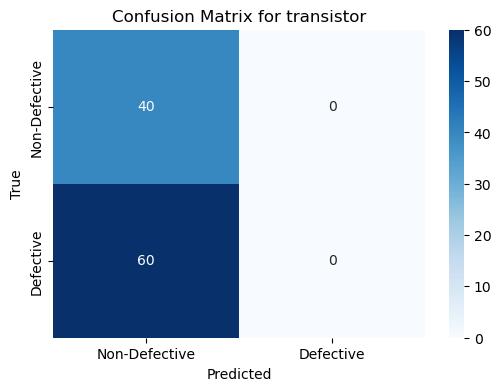

In [5]:
# List of equipment categories
categories = ['cable', 'grid', 'metal_nut', 'screw', 'transistor']

# Training loop
epochs = 10
for category in categories:
    print(f"\nTraining and evaluating model for category: {category}")

    # Create data generators for the current category
    train_generator, test_generator = create_binary_data_generators(category)
    
    # Ensure labels are in the expected format (0 for Non-Defective, 1 for Defective)
    train_labels = train_generator.classes  
    class_map = {'good': 0, 'defective': 1}  
    train_labels = np.array([class_map[label] for label in train_generator.class_indices])  
    
    # Compute class weights to handle class imbalance
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.array([0, 1]),  
        y=train_labels
    )
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Model checkpoint to save the best model
    checkpoint = ModelCheckpoint(f'best_model_{category}.keras', save_best_only=True, monitor='val_loss', mode='min')

    # Learning rate scheduler
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

    # Train the model
    history = model.fit(
        train_generator, 
        epochs=epochs, 
        validation_data=test_generator,
        class_weight=class_weight_dict,  # Apply class weights
        callbacks=[early_stopping, checkpoint, lr_scheduler],  # Apply early stopping, checkpoint, and lr scheduler
        verbose=1
    )
    
    # Predict on test data
    predictions = model.predict(test_generator)
    pred_labels = (predictions > 0.5).astype(int).reshape(-1)
    true_labels = test_generator.classes
    
    # Classification metrics
    print(f"\nClassification Report for {category}:")
    print(classification_report(true_labels, pred_labels, target_names=['Non-Defective', 'Defective']))
    
    # Confusion matrix visualization
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Defective', 'Defective'],
                yticklabels=['Non-Defective', 'Defective'])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {category}")
    plt.show()



Evaluating model for item type: cable
Found 224 images belonging to 2 classes.
Found 138 images belonging to 2 classes.
  3/138 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step  

C:\Users\Omkar Jagtap\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step

Evaluating model for item type: grid
Found 264 images belonging to 2 classes.
Found 78 images belonging to 2 classes.
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step

Evaluating model for item type: metal_nut
Found 220 images belonging to 2 classes.
Found 115 images belonging to 2 classes.
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step

Evaluating model for item type: screw
Found 320 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step

Evaluating model for item type: transistor
Found 213 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step

Overall Model Performance:
Accuracy: 0.66
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Overall Classification Report:
               precision    recall  f1-score   support

Non-Defective       0.66      1.00      0.79       389
    Defective       0.00      0.00      0.00       202

     accuracy  

c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Omkar Jagtap\anaco

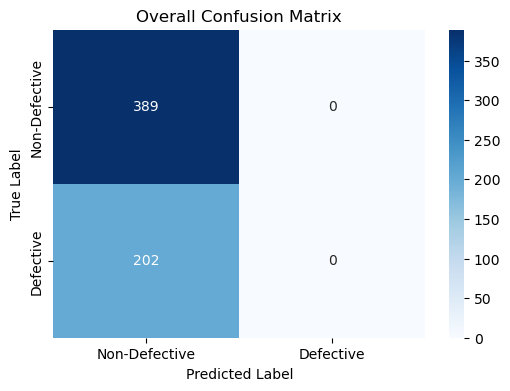

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the item types if not already defined
relevant_item_types = ['cable', 'grid', 'metal_nut', 'screw', 'transistor']  

# Initialize lists to collect true labels and predictions across all item types
all_true_labels = []
all_pred_labels = []

for item in relevant_item_types:
    print(f"\nEvaluating model for item type: {item}")
    
    # Reload test generator to ensure fresh data for each item type
    train_generator, test_generator = create_binary_data_generators(item)
    test_generator.reset()  
    
    # Predict and collect labels
    predictions = model.predict(test_generator)
    pred_labels = (predictions > 0.5).astype(int).flatten()  
    true_labels = test_generator.classes
    
    # Append true and predicted labels for evaluation
    all_true_labels.extend(true_labels)
    all_pred_labels.extend(pred_labels)

# Calculate overall metrics
overall_accuracy = accuracy_score(all_true_labels, all_pred_labels)
overall_precision = precision_score(all_true_labels, all_pred_labels, average='binary')
overall_recall = recall_score(all_true_labels, all_pred_labels, average='binary')
overall_f1_score = f1_score(all_true_labels, all_pred_labels, average='binary')

print("\nOverall Model Performance:")
print(f"Accuracy: {overall_accuracy:.2f}")
print(f"Precision: {overall_precision:.2f}")
print(f"Recall: {overall_recall:.2f}")
print(f"F1 Score: {overall_f1_score:.2f}")

# Generate an overall classification report
print("\nOverall Classification Report:")
print(classification_report(all_true_labels, all_pred_labels, target_names=['Non-Defective', 'Defective']))

# Confusion Matrix for evaluation
overall_cm = confusion_matrix(all_true_labels, all_pred_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(overall_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Defective', 'Defective'],
            yticklabels=['Non-Defective', 'Defective'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Overall Confusion Matrix")
plt.show()


